In [4]:
from config import CONFIG
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
%matplotlib notebook
import math
import numpy as np
import pandas as pd
import sys
import time

In [5]:
path = CONFIG['PATH']
pair = CONFIG['BASE'] + "/" + CONFIG['QUOTE']
one_day = 86400
sequence_length = 1
candlesticks = pd.read_csv(path + "/data/candlesticks.csv")
candlesticks['date'] = pd.Series([dt.datetime.fromtimestamp(int(ts)).strftime('%Y-%m-%d')
                                 for ts in candlesticks['date']]).values
candlesticks = candlesticks[['date','open','high','low','close','volume','weightedAverage']]

<IPython.core.display.Javascript object>


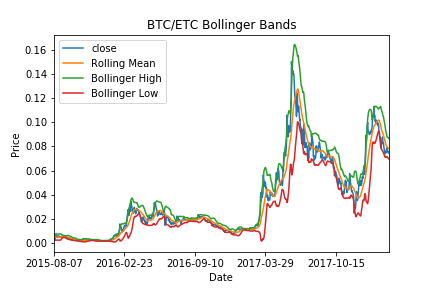

In [17]:
window = 20
no_of_std = 2

rm_btc = pd.Series(candlesticks['close']).rolling(window=window).mean()
rstd_btc = pd.Series(candlesticks['close']).rolling(window=window).std()
candlesticks['Rolling Mean'] = rm_btc
candlesticks['Rolling Mean'].fillna(method='bfill', inplace=True)


candlesticks['Bollinger High'] = rm_btc + (rstd_btc * no_of_std)
candlesticks['Bollinger High'].fillna(method='bfill', inplace=True)

candlesticks['Bollinger Low'] = rm_btc - (rstd_btc * no_of_std)
candlesticks['Bollinger Low'].fillna(method='bfill', inplace=True)

x = candlesticks['date']
ax = candlesticks[['close','Rolling Mean', 'Bollinger High', 'Bollinger Low']].plot(x, title="BTC/ETC Bollinger Bands", label="BTC/ETC")

ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')

,date,open,high,low,close,volume,weightedAverage,Rolling Mean,Bollinger High,Bollinger Low
946,2018-03-10,0.077569,0.079720,0.074788,0.075731,1492.844516,0.077432,0.079367,0.087595,0.071138
947,2018-03-11,0.075736,0.077417,0.074214,0.076427,1198.802603,0.075716,0.079252,0.087582,0.070922
948,2018-03-12,0.076427,0.077302,0.074705,0.075346,1187.711663,0.075875,0.079006,0.087499,0.070514
949,2018-03-13,0.075346,0.076318,0.073162,0.074603,1335.253344,0.075013,0.078655,0.087271,0.070039
950,2018-03-14,0.074560,0.074867,0.074070,0.074527,67.598374,0.074613,0.078166,0.086540,0.069793
